# Predicting Himalayan Expedition Success - Data Story
***

## Introduction

The Himalayan Database ©, consists of records for all expeditions in the Nepal Himalayas from 1905 through 2018. The database covers expeditions to more than 450 significant peaks, including Everest, Cho Oyu and Kangchenjunga. The database is published by The Himalayan Database ©, a non-profit organization. For more information go to http://himalayandatabase.com/index.html.



### Datasets
Three datasets peaks.csv, expeditions.csv and members.csv have already been cleaned and joined into DF_Himalayas_Expeditions.csv.

This dataset is now loaded into a DataFrame for further visual analysis.

### Outcome

As a reminder, the data will be used to predict a member's success of a summitting a certain peak, during a certain time of year, with certain support mechanisms.  

## 1. Packages and setup

In [1740]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import re
import random
#from IPython.core.interactiveshell import InteractiveShell

In [1741]:
# Set workspace

# Set output charackters to 110 (not 79)
pd.options.display.width = 110
# To give multiple cell output. Not just the last command.
InteractiveShell.ast_node_interactivity = 'last'

## 2. Load into DataFrame & Review questions to ask

In [1742]:
# Load data as 'df'
df = pd.read_csv('DF_Himalayas_Expeditions.csv')
print('Shape:', df.shape)

Shape: (65548, 68)


Ask the following questions and look for the answers using code and plots:

Can you count something interesting?

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

## 3. Data Exploration - A Breakdown

Start with the 'big' and break it down. 

First review the international locations and regions of the mountains that contain the peaks. Then display a dendrogram of the peaks' locations and aggregated expeditions/members information.

Note: A mountain massive can contain more than one peak. 

The order big-small is Country(phost) - Region(region) - Mountain(himal) - Peak(peakid) - Expedition(expid).

In [1743]:
print(df.columns)

Index(['expid', 'peakid', 'sex', 'calcage', 'citizen', 'status', 'residence', 'occupation', 'leader',
       'deputy', 'bconly', 'support', 'disabled', 'hired', 'sherpa', 'tibetan', 'msuccess', 'msolo',
       'mtraverse', 'mski', 'mparapente', 'mspeed', 'mo2used', 'mo2none', 'mo2climb', 'mo2descent',
       'mo2sleep', 'mo2medical', 'msmtterm', 'stdrte', 'year', 'season', 'host', 'route1', 'nation',
       'leaders', 'termreason', 'traverse', 'ski', 'parapente', 'camps', 'rope', 'totmembers', 'smtmembers',
       'mdeaths', 'tothired', 'smthired', 'hdeaths', 'nohired', 'o2used', 'o2none', 'o2climb', 'o2descent',
       'o2sleep', 'o2medical', 'o2taken', 'agency', 'comrte', 'xpd_success', 'smtmonth', 'heightm', 'himal',
       'region', 'open', 'unlisted', 'phost', 'pstatus', 'pyear'],
      dtype='object')


In [1744]:
# Select the columns needed for a dendrogram of grouped peaks per region with aggregated expeditions and members
df_dendro = df[['phost', 'region', 'himal', 'peakid', 'expid', 'totmembers']].copy()

In [1745]:
# Explore the country host (phost), region (region) and massif (himal) first
# This contains categorical data references the host country as int, so convert this to names
host_country = {0: 'Unclassified',
                1: 'Nepal',
                2: 'China', 
                3: 'India', 
                4: 'Nepal & China', 
                5: 'Nepal & India', 
                6: 'Nepal, China & India'}

df_dendro['phost'] = df_dendro['phost'].map(host_country)

In [1746]:
# This contains categorical data references the region as int, so convert this to names
peak_region = {0: 'Unclassified', 
               1: 'Kangchenjunga-Janak', 
               2: 'Khumbu-Rolwaling-Makalu', 
               3: 'Langtang-Jugal', 
               4: 'Manaslu-Ganesh', 
               5: 'Annapurna-Damodar-Peri', 
               6: 'Dhaulagiri-Mukut', 
               7: 'Kanjiroba-Far West'}

df_dendro['region'] = df_dendro['region'].map(peak_region)

# Explore the peaks region (region)

In [1747]:
# This contains categorical data references the mountain range as int, so convert this to names
massif = {0: 'Unclassified', 
          1: 'Annapurna', 
          2: 'Api/Byas Risi/Guras',
          3: 'Damodar', 
          4: 'Dhaulagiri', 
          5: 'Ganesh/Shringi', 
          6: 'Janak/Ohmi Kangri', 
          7: 'Jongsang', 
          8: 'Jugal', 
          9: 'Kangchenjunga/Simhalila', 
          10: 'Kanjiroba', 
          11: 'Kanti/Palchung', 
          12: 'Khumbu', 
          13: 'Langtang', 
          14: 'Makalu',
          15: 'Manaslu/Mansiri', 
          16: 'Mukut/Mustang',
          17: 'Nalakankar/Chandi/Changla', 
          18: 'Peri',
          19: 'Rolwaling', 
          20: 'Saipal'}

df_dendro['himal'] = df_dendro['himal'].map(massif)

In [1748]:
df_dendro.head()

,phost,region,himal,peakid,expid,totmembers
0,Nepal,Khumbu-Rolwaling-Makalu,Khumbu,AMAD,AMAD78301,8
1,Nepal,Khumbu-Rolwaling-Makalu,Khumbu,AMAD,AMAD78301,8
2,Nepal,Khumbu-Rolwaling-Makalu,Khumbu,AMAD,AMAD78301,8
3,Nepal,Khumbu-Rolwaling-Makalu,Khumbu,AMAD,AMAD78301,8
4,Nepal,Khumbu-Rolwaling-Makalu,Khumbu,AMAD,AMAD78301,8


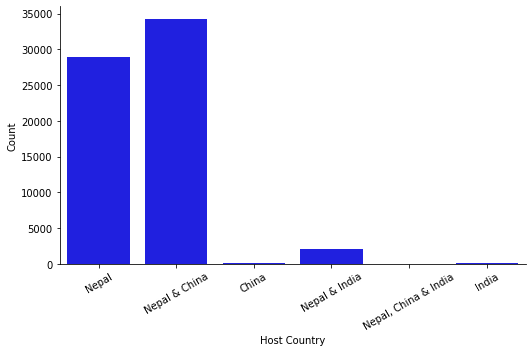

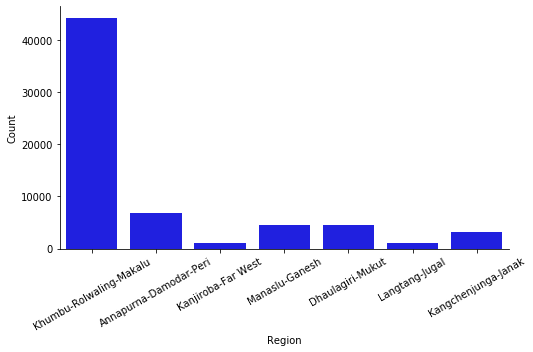

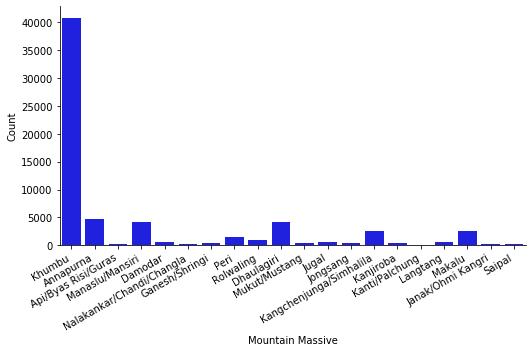

In [1749]:
# Explore the country host (phost), region (region) and massif (himal) first

# Explore the host countries (phost)
ax = sns.catplot('phost', data=df_dendro, aspect=1.5, kind='count', color='b')
ax.set_xticklabels(rotation=30)
plt.tight_layout()
ax.set(xlabel='Host Country', ylabel='Count')

# Explore the peaks region (region)
ax = sns.catplot('region', data=df_dendro, aspect=1.5, kind='count', color='b')
ax.set_xticklabels(rotation=30)
plt.tight_layout()
ax.set(xlabel='Region', ylabel='Count')

# Explore the mountain massive (himal)
#ax = plt.figure(figsize=(18,4))
ax = sns.catplot('himal', data=df_dendro, aspect=1.5, kind='count', color='b', orient='h')
ax.set_xticklabels(rotation=30, ha="right")
plt.tight_layout()
ax.set(xlabel='Mountain Massive', ylabel='Count')

Most expeditions were in Nepal and peaks that strectched into both Nepal and China.

By far the most expeditions were in the Khumbu-Rolwaling-Makalu region and the Khumbu mountain region.

Describe in which region the mountains are located and in which country.

EVER    17703
CHOY     8302
MAKA     2112
LHOT     1905
PUMO     1732
Name: peakid, dtype: int64

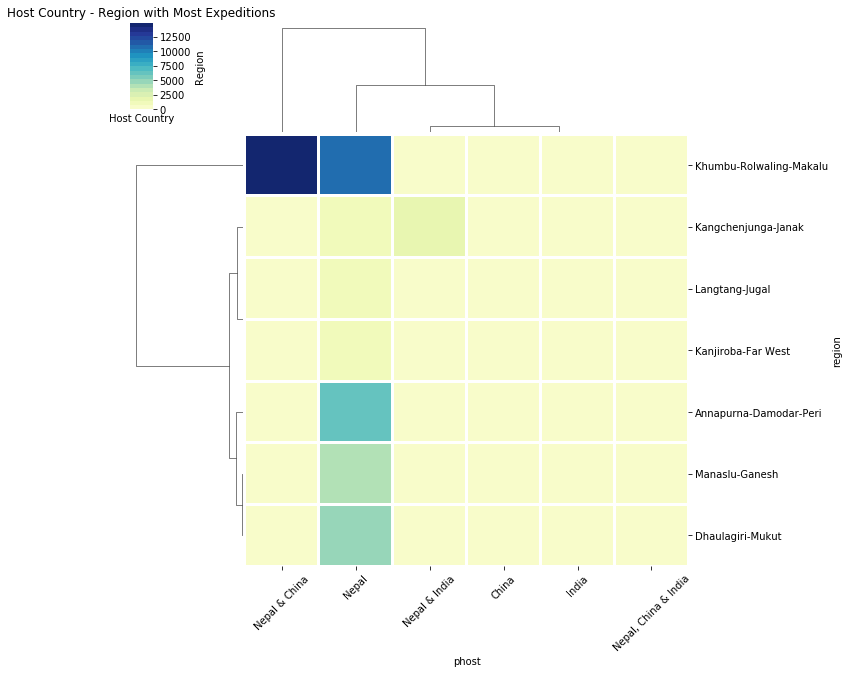

In [1750]:
# Select the columns needed for the map of grouped peaks per region with aggregated expeditions or members
df_cr = df[['phost', 'region', 'totmembers']].copy()

# Create pivot table for heatmap. aggfunc = 'count' for expeditions and 'sum' for members
pivot_cr = df_cr.pivot_table(index='region', columns='phost', values='totmembers', 
                                       aggfunc='count', fill_value=0)

# Add x-axis labels
host_country.pop(0, None)
xticks = list(host_country.values())
peak_region.pop(0, None)
yticks = list(peak_region.values())

# Plot cluster
cp = sns.color_palette("YlGnBu", 20)
g = sns.clustermap(pivot_cr, linewidths=2, cmap=cp, xticklabels=xticks, yticklabels=yticks, robust=True)
plt.xlabel('Host Country')
plt.ylabel('Region')
plt.title('Host Country - Region with Most Expeditions')
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45) 

# Display the 5 top peaks in the Nepal & China host country that contain the Khumbu-Rolwaling-Makalu region
df[(df['phost'] == 4) & (df['region'] == 2)]['peakid'].value_counts().head()
# As can be seen, Mount Everest is in this region

(65548, 3)

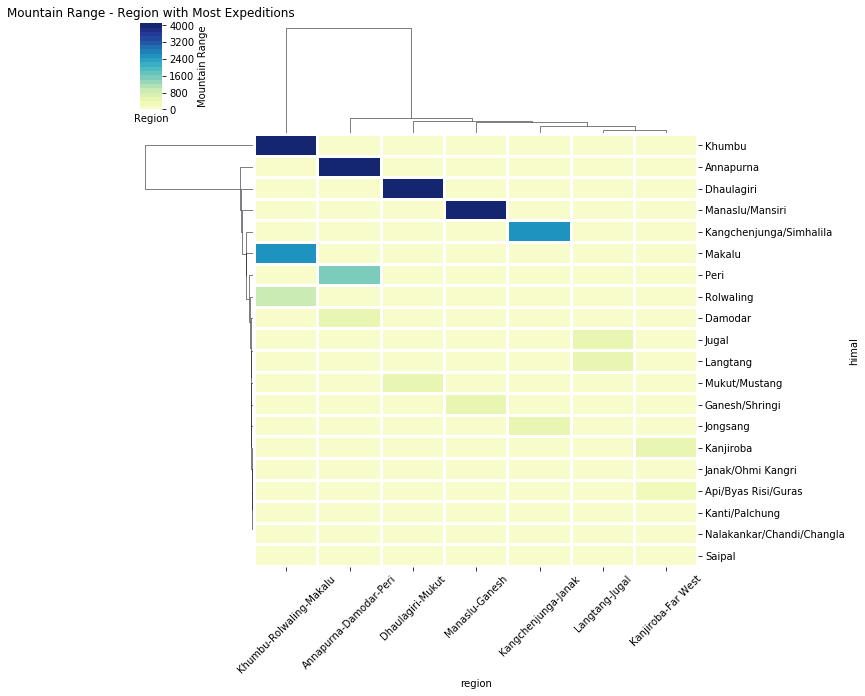

In [1751]:
# Select the columns needed for the map of grouped peaks per region with aggregated expeditions or members
df_rm = df[['region', 'himal', 'totmembers']].copy()

# Create pivot table for heatmap. aggfunc = 'count' for expeditions and 'sum' for members
pivot_rm = df_rm.pivot_table(index='himal', columns='region', values='totmembers', 
                                       aggfunc='count', fill_value=0)

# Add x-axis labels
peak_region.pop(0, None)
xticks = list(peak_region.values())
massif.pop(0, None)
yticks = list(massif.values())

# Plot cluster
cp = sns.color_palette("YlGnBu", 20)
g = sns.clustermap(pivot_rm, linewidths=2, cmap=cp, xticklabels=xticks, yticklabels=yticks, robust=True)
plt.xlabel('Region')
plt.ylabel('Mountain Range')
plt.title('Mountain Range - Region with Most Expeditions')
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45) 

df_rm.shape

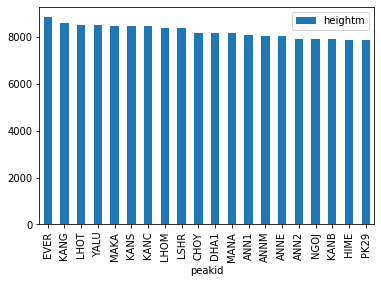

In [1752]:
# Explore top 20 highest peaks
df[['peakid', 'heightm']].groupby('peakid').max().sort_values(by=['heightm'], ascending=False).\
    head(20).plot(kind='bar')

Mean age: 37


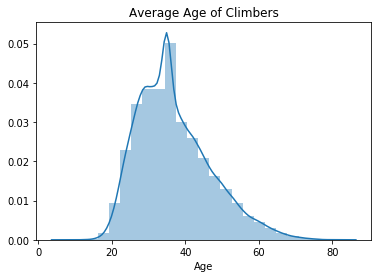

In [1753]:
# Explore age distribution
sns.distplot(df['calcage'], bins=25)
plt.title('Average Age of Climbers')
plt.xlabel('Age')
print('Mean age:', int(round(df['calcage'].mean())))

The spike at the age of 37 could be explained by replacing the NaN values with the average age. A better imputation will be needed.

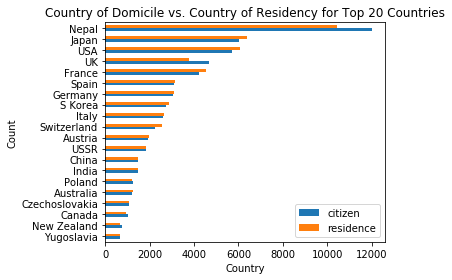

In [1754]:
# Explore citizen/residence distribution

# Combine citizen and residence as DF to compare
citizen = df['citizen'].value_counts().head(20)
residence = df['residence'].value_counts().head(20)

df_cit = pd.DataFrame(citizen)
df_res = pd.DataFrame(residence)

# Join the 2 DFs
df_where = df_cit.join(df_res).sort_values('citizen').copy()
# Plot
ax = df_where.plot(kind='barh')
ax.set(xlabel='Country', ylabel='Count')
plt.title('Country of Domicile vs. Country of Residency for Top 20 Countries')
plt.tight_layout()

There might not be significant difference between members' Country of Domicile vs. Country of Residency, so will consider dropping one.

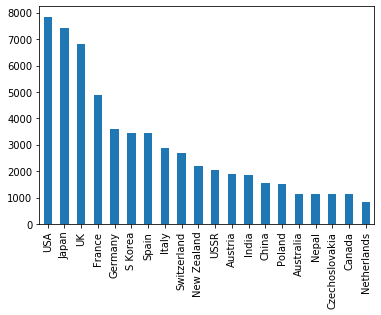

In [1755]:
# Explore expedition countries. Each expedition is also represented by a country, although it's individual 
# members might be from other countries
ax = df['nation'].value_counts().head(20).plot(kind='bar')

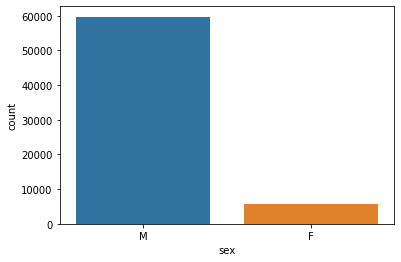

In [1756]:
# Explore gender distribution
ax = sns.countplot('sex', data=df)

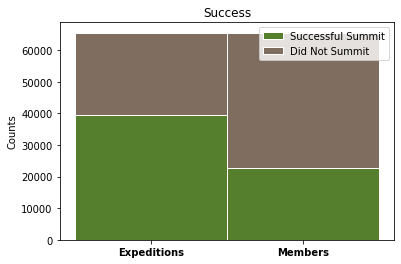

Expedition Fail - Member Success: 9
Expedition Success - Member Fail: 16671


In [1757]:
# Review success metrics first
# 'xpd_success' refers to success of expeditions to summit
#print('Expedition Success:\n', df.xpd_success.value_counts())
# 'msuccess' referes to success of indivual members to summit
#print('Member Success:\n', df.msuccess.value_counts())

# Values of each group
bars1 = [df.groupby('xpd_success').count()['msuccess'][1], df.groupby('msuccess').count()['xpd_success'][1]]
bars2 = [df.groupby('xpd_success').count()['msuccess'][0], df.groupby('msuccess').count()['xpd_success'][0]]

# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Expeditions','Members']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#557f2d', edgecolor='white', width=barWidth, label='Successful Summit')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#7f6d5f', edgecolor='white', width=barWidth, label='Did Not Summit')
 
# Custom axis
plt.xticks(r, names, fontweight='bold')
plt.title('Success')
plt.ylabel('Counts')
plt.legend()
 
# Show graphic
plt.show()

# How many member successes where the expedition was not successful
print('Expedition Fail - Member Success:', len(df[(df['xpd_success'] == False) & (df['msuccess'] == True)]))
# How many unsuccessful members where the expedition was successful
print('Expedition Success - Member Fail:', len(df[(df['xpd_success'] == True) & (df['msuccess'] == False)]))

It is clear from the combined barplot that not all members in an expedition reaches the summit. 

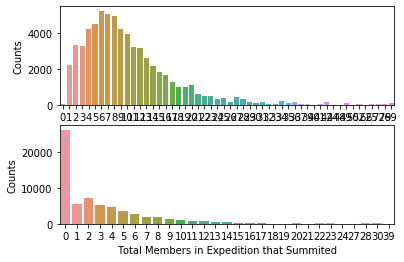

In [1758]:
# Plot total members in an expedition and total members that summmited per expedition

f, axes = plt.subplots(2, 1)
plt.rcParams["figure.figsize"] = (14, 8)

sns.countplot(x='totmembers', data=df, ax=axes[0])
axes[0].set(xlabel='Total Members in Expedition', ylabel='Counts')

sns.countplot(x='smtmembers', data=df, ax=axes[1])
axes[1] = axes[1].set(xlabel='Total Members in Expedition that Summited', ylabel='Counts')

The most common size of expeditions are 5-8 members, but only few reach the summit. 

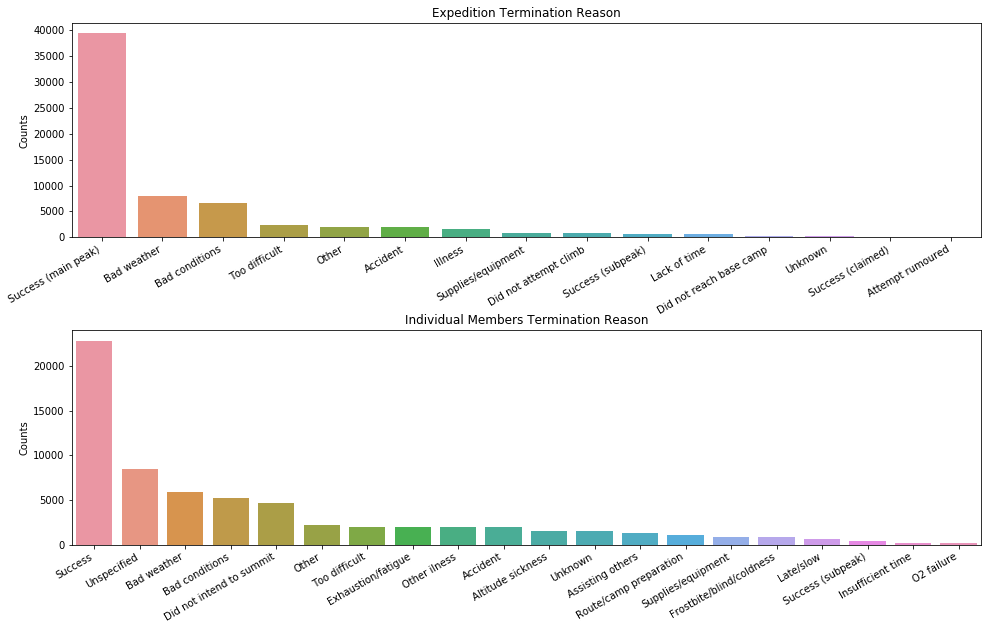

In [1759]:
# Select the columns needed 
df_term = df[['termreason', 'msmtterm']].copy()

# The descriptive reasons for expedition terminations 'termreason'
xpd_term = {0: 'Unknown',
            1: 'Success (main peak)', 
            2: 'Success (subpeak)', 
            3: 'Success (claimed)', 
            4: 'Bad weather', 
            5: 'Bad conditions', 
            6: 'Accident', 
            7: 'Illness', 
            8: 'Supplies/equipment', 
            9: 'Lack of time',
            10: 'Too difficult', 
            11: 'Did not reach base camp',
            12: 'Did not attempt climb', 
            13: 'Attempt rumoured', 
            14: 'Other'}
# Assign new value names
df_term['termreason'] = df_term['termreason'].map(xpd_term)

# The descriptive reasons for individual member terminations 'msmtterm'
mem_term = {0: 'Unspecified',
            1: 'Success', 
            2: 'Success (subpeak)', 
            3: 'Bad weather', 
            4: 'Bad conditions', 
            5: 'Accident', 
            6: 'Altitude sickness', 
            7: 'Exhaustion/fatigue', 
            8: 'Frostbite/blind/coldness', 
            9: 'Other ilness',
            10: 'Supplies/equipment', 
            11: 'O2 failure',
            12: 'Too difficult', 
            13: 'Late/slow', 
            14: 'Assisting others', 
            15: 'Route/camp preparation', 
            16: 'Insufficient time', 
            17: 'Did not intend to summit', 
            18: 'Other', 
            19: 'Unknown'}
# Assign new value names
df_term['msmtterm'] = df_term['msmtterm'].map(mem_term)

# Plot total members in an expedition and total members that summmited per expedition
# Set subplots
f, axes = plt.subplots(2, 1)
plt.rcParams["figure.figsize"] = (14, 8)

# Plot expedition terminations
sns.countplot(x='termreason', data=df_term, ax=axes[0], order = df_term['termreason'].value_counts().index)
axes[0].set(title='Expedition Termination Reason', xlabel='', ylabel='Counts')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()

# Plot member terminations
sns.countplot(x='msmtterm', data=df_term, ax=axes[1], order = df_term['msmtterm'].value_counts().index)
axes[1].set(title='Individual Members Termination Reason', xlabel='', ylabel='Counts')
axes[1] = axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")

Most expeditions are successful and reach the summit. Of those that are unsuccessful it is mainly due to bad weather and poor conditions. The same seems to be true for individuals.

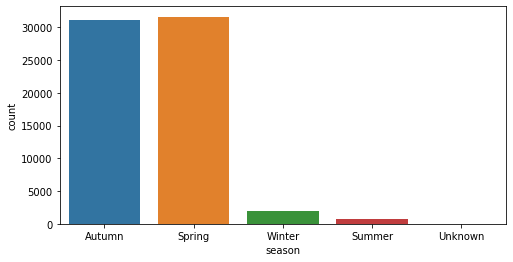

In [1760]:
# Seasons 'season'
df_season = df[['expid', 'season']].copy()

# Assign new value names
season = {0: 'Unknown',
          1: 'Spring', 
          2: 'Summer', 
          3: 'Autumn', 
          4: 'Winter'}
df_season['season'] = df_season['season'].map(season)

plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot('season', data=df_season)

Expeditions generally occur in Autumn and Spring.

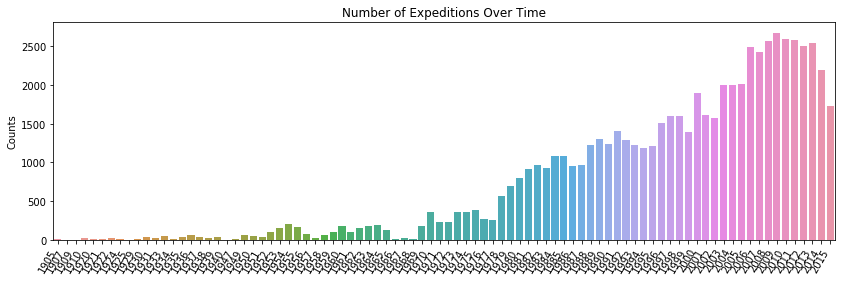

In [1761]:
# Explore expeditions over time.
plt.rcParams["figure.figsize"] = (14, 4)
ax = sns.countplot('year', data=df)
ax.set(title='Number of Expeditions Over Time', xlabel='', ylabel='Counts')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

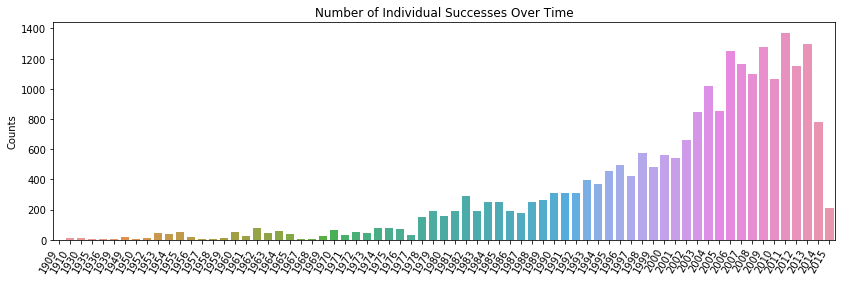

In [1762]:
# Explore individual member success. Only look at successfull attempts.
df_ind_suc = df[df['msmtterm'] == 1].copy()

plt.rcParams["figure.figsize"] = (14, 4)
ax = sns.countplot('year', data=df_ind_suc)
ax.set(title='Number of Individual Successes Over Time', xlabel='', ylabel='Counts')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

The number of expeditions over time shows a similar pattern to the number of individual successes over time.

## 4. Explore Relational Data

Visualise how data relates and investigate correlations.

There are more individual successes than expedition successes.

In [1763]:
df.columns

Index(['expid', 'peakid', 'sex', 'calcage', 'citizen', 'status', 'residence', 'occupation', 'leader',
       'deputy', 'bconly', 'support', 'disabled', 'hired', 'sherpa', 'tibetan', 'msuccess', 'msolo',
       'mtraverse', 'mski', 'mparapente', 'mspeed', 'mo2used', 'mo2none', 'mo2climb', 'mo2descent',
       'mo2sleep', 'mo2medical', 'msmtterm', 'stdrte', 'year', 'season', 'host', 'route1', 'nation',
       'leaders', 'termreason', 'traverse', 'ski', 'parapente', 'camps', 'rope', 'totmembers', 'smtmembers',
       'mdeaths', 'tothired', 'smthired', 'hdeaths', 'nohired', 'o2used', 'o2none', 'o2climb', 'o2descent',
       'o2sleep', 'o2medical', 'o2taken', 'agency', 'comrte', 'xpd_success', 'smtmonth', 'heightm', 'himal',
       'region', 'open', 'unlisted', 'phost', 'pstatus', 'pyear'],
      dtype='object')

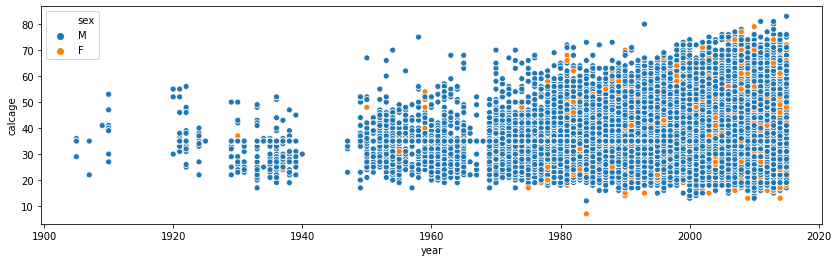

In [1764]:
# Age distribution over time
ax = sns.scatterplot(x='year', y='calcage', hue='sex', data=df)

The age range increased over the years and more women started joining expeditions. 

Interesting are the gaps in the data showing the years with no expeditions. This could be explained by the WW1, the Great Depression, WW2 and perhaps the Vietnam War. 

In [1765]:
# USE LATER
#g = sns.FacetGrid(df, col="phost")
#g.map(plt.hist, "region")